# Промежуточная аттестация №1

Аттестационная работа состоит из двух заданий, которые проверяют ваши знания по основным темам, пройденным на лекциях в первом блоке.  
Для прохождения аттестации необходимо выполнить оба задания и загрузить результат на платформу в формате *.ipynb.

**Важно:** задания во многом творческие и не имеют единственно правильного решения!

### Задание 1:

**Описание:** Выберите интересный вам DataSet на https://www.kaggle.com/datasets (выгрузите его и приложите к решению ИЛИ включите в решение импорт DataSet-a из внешнего источника, который публично доступен без регистрации!). 

**Ограничение:** размер DataSet-а не более 10Mb.

Выполните следующие шаги:
1. Получение данных:
    - Напишите код для загрузки данных вашего DataSet-a
2. Предварительная обработка данных:
    - Преобразуйте данные в DataFrame.
    - Выполните очистку данных (удалите пропущенные значения, если есть). 
    - Добавьте новые вычисляемые атрибуты, если в них есть смысл.
3.   Вычисление статистик и показателей – от 3 до 5 по вашему DataSet-у исходя из предметной области.  
* Например, для коллекции фильмов это может быть:  
    - Количество фильмов по жанрам.
    - Средний рейтинг фильмов.
    - Фильмы с наивысшим рейтингом.
4. Визуализация данных – от 3 до 5 графиков по вашему DataSet-у исходя из предметной области. 
* Например, для коллекции фильмов это может быть:
    - Гистограмма количества фильмов по годам или жанрам. 
    - График распределения рейтингов фильмов.


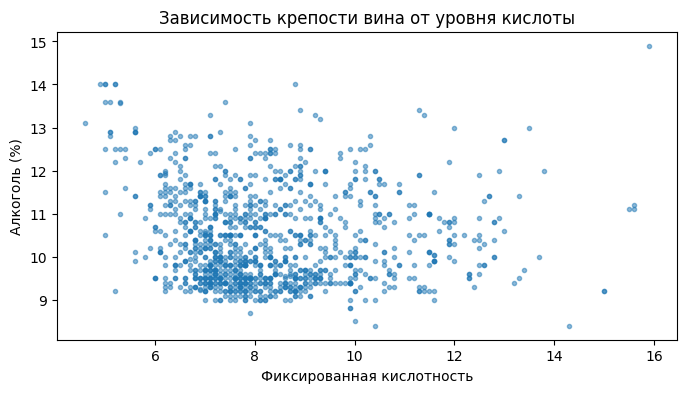

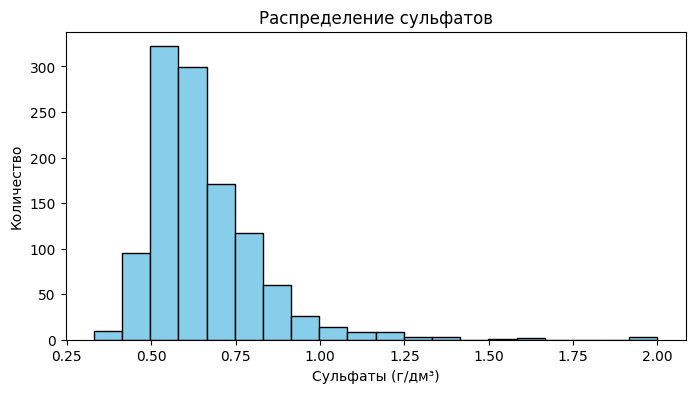

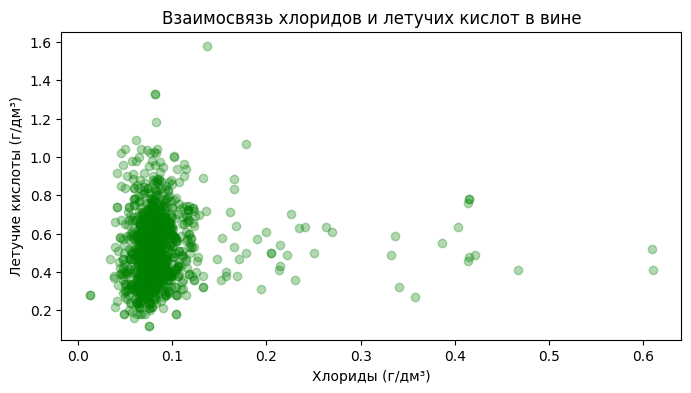

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("WineQT.csv")

# удаление пропущенных значений
df.dropna(inplace=True) 

# вычисление статистик

# средний водродный показатель
average_ph = df['pH'].mean()
# количество вин
total_wines = df['Id'].count()
# среднее количество алкоголя
average_alcohol = df['alcohol'].mean()
# Количество вин с качеством выше 6
high_quality_count = (df['quality'] > 6).sum()

# print(average_ph)
# print(total_wines)
# print(average_alcohol)
# print(high_quality_count)

#графики
plt.figure(figsize=(8, 4))
plt.plot(df['fixed acidity'], df['alcohol'], 'o', markersize=3, alpha=0.5)
plt.title('Зависимость крепости вина от уровня кислоты')
plt.xlabel('Фиксированная кислотность')
plt.ylabel('Алкоголь (%)')
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(df['sulphates'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение сульфатов')
plt.xlabel('Сульфаты (г/дм³)')
plt.ylabel('Количество')
plt.show()

plt.figure(figsize=(8, 4))
plt.scatter(df['chlorides'], df['volatile acidity'], alpha=0.3, color='green')
plt.title('Взаимосвязь хлоридов и летучих кислот в вине')
plt.xlabel('Хлориды (г/дм³)')
plt.ylabel('Летучие кислоты (г/дм³)')
plt.show()


### Задание 2:

Некоторые системы выстраивают схему данных в базе в несколько необычном формате:  
в одной таблице хранятся экземпяры сущностей, а в другой пары их атрибутов (название атрибута - значение атрибута).  
Такая модель хранения назвается EAV - Entity Atribute Value.

Будучи разработчиком системы вы можете не подозревать, какие подводные камни могут быть с этим связаны.

Рассмотрим простой пример, допустим у вас есть 2 таблиц в такой схеме хранения:
1) Таблица и базовой информацией о пользователях - users:

In [3]:
create table users (
	id int primary key,
	full_name varchar(100)
);

insert into users (id, full_name) 
values (1, 'Иванов Иван'), 
       (2, 'Анина Анна'),
	   (3, 'Матвеев Матвей');

TabError: inconsistent use of tabs and spaces in indentation (<string>, line 9)

2) Таблица с атрибутами пользователей - users_meta:

In [ ]:
create table users_meta (
	id int primary key,
	user_id int references users(id),
	meta varchar(16),
	meta_value varchar(64)
);

insert into users_meta (id, user_id, meta, meta_value) 
values (1, 1, 'birth-date', '2000-01-02'),
	   (2, 1, 'phone-number', '89998887766'),
	   (3, 1, 'activity-flag', 'Y'),
	   (4, 1, 'register-date', '2025-02-04');
	   
insert into users_meta (id, user_id, meta, meta_value) 
values (5, 2, 'birth-date', '2002-06-12'),
	   (6, 2, 'activity-flag', 'N'),
	   (7, 2, 'register-date', '2023-01-23');
	   
insert into users_meta (id, user_id, meta, meta_value) 
values (8, 3, 'phone-number', '89998884455'),
	   (9, 3, 'activity-flag', 'Y'),
	   (10, 3, 'register-date', '2024-12-05');

В информационной системе для обращения к данным используется нотация, очень похожая на работу через ORM.  
Например, так выглядит запрос, который будет вытаскивать ID пользователей, для которых заполен хотябы один из атрибутов `birth-date`, `phone-number`, `activity-flag` или `register-date`:

In [4]:
query = new User_Query( 
    array( 'meta_query' => array( 
        array( 'key' => 'birth-date' ),
        array( 'key' => 'phone-number'),
        array( 'key' => 'activity-flag' ),
        array( 'key' => 'register-date' ),
        'relation' => 'OR' ) ) );

SyntaxError: invalid syntax (767921733.py, line 1)

При формировании запроса "под капотом" система преобразует это обращени в обычный SQL запрос вида:

In [ ]:
# исходный запрос
SELECT distinct users.id
FROM users 
	INNER JOIN users_meta AS mt1 ON ( users.ID = mt1.user_id )  
	INNER JOIN users_meta AS mt2 ON ( users.ID = mt2.user_id )  
	INNER JOIN users_meta AS mt3 ON ( users.ID = mt3.user_id )
	INNER JOIN users_meta AS mt4 ON ( users.ID = mt4.user_id )
WHERE 1=1 
AND (( mt1.meta = 'birth-date' AND mt1.meta_value != '' ) 
  OR ( mt2.meta = 'phone-number' AND mt2.meta_value != '' ) 
  OR ( mt3.meta = 'activity-flag' AND mt3.meta_value != '' )
  OR ( mt4.meta = 'register-date' AND mt4.meta_value != '' )
);

Ответьте на несколько вопросов:
* Видите ли вы какие-нибудь проблемы в этом запросе? Избыточные JOIN
* В какой момент пользователи системы начнут испытывать дискомфорт при работе с информационной системой и почему? При увеличении объема данных запросы будут выполняться медленно
* Что можно сделать? Убрать лишние join, испльзовать индексы

Перепишите запрос так, чтобы исправить ситуацию ИЛИ внесите концептуальные предложения, которые помогут улучшить ситуацию.

In [ ]:
# ваш запрос или концептуальные предложения
SELECT distinct users.id
FROM users
INNER JOIN users_meta ON users.id = users_meta.user_id
WHERE 
    (users_meta.meta = 'birth-date' AND users_meta.meta_value != '') OR
    (users_meta.meta = 'phone-number' AND users_meta.meta_value != '') OR
    (users_meta.meta = 'activity-flag' AND users_meta.meta_value != '') OR
    (users_meta.meta = 'register-date' AND users_meta.meta_value != '');